### Overview

<html>
  <body>
     <a id="top"></a>

We will analyse the question: “what sorts of people were more likely to survive?” through Visualisations,further will go with Data preprocessing,Feature Engineering,Building Machine Learning Model,finally Prediction and Submission.

### Contents<a name="top"></a>

[1. **Importing the Libraries**](#section1)
<br>
[2. **Getting Data Set**](#section2)
<br>
[3. **Data variable Notes**](#section3)
<br>
[4. **Check null  and Missing value**](#section4)
<br>
[5. **Feature Analysis & Visualization**](#section5)
<br>
[6. **Correlation**](#section6)
<br>
[7. **Feature Engineeering**](#section7)
<br>
[8. **Handling Categorical Features**](#section8)
<br>
[9. **Create New Features**](#section9)
<br>
[10. **Create Machine Learning Model for Prediction**](#section10)
<br>
[11. **Model evaluation**](#section11)<br>
[ ⨀ K-Fold cross Validation](#section12)<br>
[⨀  Feature Importance](#section13)<br>
[ ⨀ OOB(Out of bag)](#section14)<br>
[ ⨀ Confusion Metrix](#section15)<br>
[ ⨀ Precision and Recall](#section16)<br>
[⨀  F1 Score](#section17)<br>
[⨀  ROC AUC Score](#section18)<br>   
[12. **Submission**](#section19)<br>
[13. **Conclusion**](#section20)


### Importing the Libraries ⫲ <a id='section1'></a> <a href="#top"> Back to Top▲</a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rnd

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Getting Dataset  ⫲<a id='section2'></a> <a href="#top"> Back to Top▲</a>

In [ ]:
train_df = ("../input/titanic/train.csv")
test_df = ("../input/titanic/test.csv")

In [ ]:
train_df = pd.read_csv(train_df)
test_df = pd.read_csv(test_df)

In [ ]:
combine = [train_df,test_df]

### Data variable notes ⫲<a id='section3'></a> <a href="#top"> Back to Top▲</a>


##### pclass: 
1st = Upper,
2nd = Middle,
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way..
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way..
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

##### Embarked(Port of Embarkation)
C = Cherbourg, Q = Queenstown, S = Southampton


In [ ]:
train_df.tail()

In [ ]:
train_df.info()

In [ ]:
train_df.isnull().sum()

In [ ]:
test_df.info()

### Check null  and missing value ⫲ <a id='section4'></a>  <a href="#top"> Back to Top▲</a>

In [ ]:
test_df.isnull().sum()

In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [ ]:
train_df.describe(include='all')

In [ ]:
test_df.describe(include='all')

### Feature Analysis ⫲<a  id='section5'></a> <a href="#top"> Back to Top▲</a>

#### Create bar chart for below categorical features

* Pclass---- (1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex------- (Male or Female)
* SibSp----- (Number of siblings and spouse)
* ParCh----- (Number of parents and children)
* Embarked-(Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* Cabin----- (cabin Number)

######  Crating function for barchart

In [ ]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    notsurvived = train_df[train_df['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived,notsurvived])
    df.index = ['Survived','Not Survived']
    df.plot(kind = 'bar',stacked=False,figsize=(9,5))

In [ ]:
bar_chart('Pclass')

##### Survived- The first class people more likely survived
##### Not Survived- The third class people more likely not survived

In [ ]:
bar_chart('Sex')

##### Survived- Females are more likely survived
##### Not Survivied- Males are more likely Not survived

**Calculating % of Woman and Men survived**

In [ ]:
women = train_df.loc[train_df.Sex=='female']['Survived']
rate_women = sum(women)/len(women)*100
print('women Survived',rate_women, '%')

In [ ]:
men = train_df.loc[train_df.Sex=='male']['Survived']
rate_men = sum(men)/len(men)*100
print ('men survived',rate_men,'%')

From this you can see that almost 75% of the women on board survived, whereas only 19% of the men lived to tell about it. Gender seems to be such a strong indicator of survival,

In [ ]:
bar_chart('SibSp')

##### Survived- People with more than two siblings or spouse are likely survived
##### Not Survived- People with no siblings or spouse(single) are likely not survived

In [ ]:
bar_chart('Parch')

##### Survived- People with no families with them likely survived
##### Not Survived- People with no families are likely not survived

In [ ]:
bar_chart('Embarked')

##### In both Survived and Not survived section shows that passenders are embarked from Southampton(S)




### Correlation ⫲<a id='section6'></a> <a href="#top"> Back to Top▲</a>

###### Correlation matrix for showing correlation coeficients between variables

In [ ]:
train_df.columns

In [ ]:
C_matrix = sns.heatmap(train_df[['Survived', 'Age', 'SibSp',
       'Parch',  'Fare']].corr(),
                       annot=True,fmt='.2f',cmap ='coolwarm')

###### Fare have a significant correlation with  Survival probability

To check the correlation of other features we need to explore more

##### Age 

In [ ]:
age_sur = sns.FacetGrid(train_df, col = 'Survived')
age_sur = age_sur.map(sns.distplot,'Age')

We notice that age distributions are not the same in survived  and notsurvived population.
Passenger between 60-80 have less survived.
It seems that young passengers have more chance to survive.

###### Explore Age distribution with kde plot

In [ ]:
g = sns.kdeplot(train_df['Age'][(train_df['Survived']==0 & train_df['Age'].notnull())],
                color = 'green',shade =  True)
g = sns.kdeplot(train_df['Age'][(train_df['Survived']==1 & train_df['Age'].notnull())],
                color = 'Red',shade =  True)
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived','Survived'])

Noticed that peak for survival of children aged between 0 and 5

###### Pclass

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df)
ax1.set_title('Survival Rate')
ax1.set_xticklabels(['1 Upper','2 Middle','3 Lower'])
ax1.set_ylim(0,400)
ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Count')
ax1.legend(['No','yes'])

In [ ]:
fig = plt.figure(figsize=(10,10))
ax2 = plt.subplot(2,1,2)
sns.pointplot(x='Pclass',y='Survived',data = train_df)
ax2.set_xlabel('Ticket Class')
ax2.set_ylabel('Percent Survived')
ax2.set_title('Survival Percentage')

The higher the class, more likely to have survived.

##### SibSp

Survival rate vs Siblings or Spouse on Board

In [ ]:
g= sns.factorplot(x='SibSp', y='Survived',data =train_df,kind = 'bar', palette = 'muted',size = 5)


Passenger with more siblings or spouse have less chance to survive

###### Parch

In [ ]:
g = sns.factorplot(x='Parch',y='Survived',data= train_df,kind = 'bar',size =5,palette='muted')

Notice the deviation of passengers with parents and children cont 3.

###### Fare

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.swarmplot(x='Pclass',y='Fare',data=train_df,hue= 'Survived')


Pclass contain highest fare have highest level of survival

### Feature Engineering ⫲<a id='section7'></a> <a href="#top"> Back to Top▲</a>

We need to drop 'PassengerId' from Train set as it does not contribute any value to survival probability.

In [ ]:
train_df = train_df.drop(['PassengerId'],axis=1)

###### Missing Data

In [ ]:
sns.heatmap(train_df.isnull())

In [ ]:
train_df.isnull().sum()

As per our  analysis we have to deal with below columns
Age 177 missing values,  Cabin 684 missing values,  Embarked 2 missinig values .


Letus handle each missing value column

###### Cabin

In [ ]:
import re
deck = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data = [train_df,test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('H0')
    dataset['Deck']  = dataset['Cabin'].map(lambda x: re.compile('([a-z,A-Z]+)').search(x).group())
    dataset['Deck']  = dataset['Deck'].map(deck)
    dataset['Deck']  = dataset['Deck'].fillna(0)
    dataset['Deck']  = dataset['Deck'].astype(int)

Cabin value is mapped to new feature( column 'Deck' )with numerical value,So we can drop Cabin column for Train set and Test set

In [ ]:
train_df = train_df.drop(['Cabin'],axis = 1)
test_df = test_df.drop(['Cabin'],axis = 1)

#### Age

Other feature 'Age' have missing value will be calculated with mean,is_null and standered deviation of Age.

In [ ]:
age_df = [train_df,test_df]
for data in age_df:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = data['Age'].isnull().sum()
    # generate random numbers
    age_rand = np.random.randint(mean - std,mean + std,size = is_null)
    age_copy = data['Age'].copy()
    age_copy[np.isnan(age_copy)] = age_rand
    data['Age'] = age_copy
    data['Age'] = train_df['Age'].astype(int)




In [ ]:
train_df['Age'].isnull().sum()

###### Embarked

Since Embarked have only 2 missing value we are trying to fill with most common one.

In [ ]:
train_df['Embarked'].describe()

In [ ]:
top = 'S'
data = [train_df,test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(top)

### Handling Categorical features ⫲<a id='section8'></a> <a href="#top"> Back to Top▲</a>

In [ ]:
train_df.info()

In [ ]:
test_df.info()

There are 4 categorical features let us convert one by one along with 'Fare' as it is float.

###### Fare

In [ ]:
test_df['Fare'].isnull().sum()

In [ ]:
data= [train_df,test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
test_df['Fare'].isnull().sum()

Create new feature using title of Name

In [ ]:
data = [train_df,test_df]
Title = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand = False)
#Replace title with more common one
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr', 
                                                'Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].map(Title)
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
dataset['Title'].unique()

In [ ]:
train_df = train_df.drop(['Name'],axis = 1)
test_df = test_df.drop(['Name'],axis = 1)

###### Sex

In [ ]:
gender = {'male':0,'female':1}
data = [train_df,test_df]

for dataset in data:
    dataset['Sex'] =dataset['Sex'].map(gender)

###### Ticket

In [ ]:
 train_df['Ticket'].describe()

As there is 681 unique count ,we will drop ticket feature from our dataset.

In [ ]:
train_df = train_df.drop(['Ticket'],axis = 1)
test_df = test_df.drop(['Ticket'],axis = 1)

###### Embarked

In [ ]:
port = {'S':0,'C':1,'Q':2}
data = [train_df,test_df]

for dataset in data:
    dataset['Embarked'] =dataset['Embarked'].map(port)

###### New feature Age Group

In [ ]:
data = [train_df,test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <=11,'Age'] =0
    dataset.loc[(dataset['Age'] >11) & (dataset['Age']<=18),'Age'] = 1
    dataset.loc[(dataset['Age'] >18) & (dataset['Age']<=22),'Age'] = 2
    dataset.loc[(dataset['Age'] >22) & (dataset['Age']<=27),'Age'] = 3
    dataset.loc[(dataset['Age'] >27) & (dataset['Age']<=33),'Age'] = 4
    dataset.loc[(dataset['Age'] >33) & (dataset['Age']<=40),'Age'] = 5
    dataset.loc[(dataset['Age'] >40) & (dataset['Age']<=66),'Age'] = 6
    dataset.loc[dataset['Age']>66,'Age'] = 6
    
    

In [ ]:
train_df['Age'].value_counts()

###### Fare

Let us see the distribution Fare value

In [ ]:
train_df.head(10)

In [ ]:
plt.hist(train_df['Fare'],bins = 30)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')
plt.show()

This didstribution is leftside skew,to resolve this there are two possible approches.
<br>
1,Barke down Fare feature in to equal bins.
<br>
2,Log transformation for normal distribution.
<br>
Let us choose the first one,because after using Log transformation, F1 Score going down,for that we can use qcut function

In [ ]:
train_df['Fare'] = pd.qcut(train_df['Fare'],4)
lbl = LabelEncoder()
train_df['Fare'] = lbl.fit_transform(train_df['Fare'])
    

In [ ]:
test_df['Fare'] = pd.qcut(test_df['Fare'],4)
lbl = LabelEncoder()
test_df['Fare'] = lbl.fit_transform(test_df['Fare'])

In [ ]:
plt.hist(train_df['Fare'],bins = 30)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')
plt.show()

Log Transformation

In [ ]:
#train_df["Fare"] = train_df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
#test_df["Fare"] = test_df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

### Create new  Features ⫲<a id='section9'></a> <a href="#top"> Back to Top▲</a>

###### Age Multiplied with Pclass

In [ ]:
data = [train_df,test_df]
for dataset in data:
    dataset['Age_Pclass'] = dataset['Age'] * dataset['Pclass']

###### Add relative column

In [ ]:
data = [train_df,test_df]
for dataset in data:
    dataset['Relative'] = dataset['SibSp']+dataset['Parch']

###### Fare per Person

In [ ]:
data = [train_df,test_df]
for dataset in data:
    dataset['Fare_Person'] = dataset['Fare']/(dataset['Relative']+1)
    dataset['Fare_Person'] = dataset['Fare_Person'].astype(int)

In [ ]:
train_df.head(10)

### Create Machine Learning Model for Prediction ⫲<a id='section10'></a> <a href="#top"> Back to Top▲</a>


The challenge is we have to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. <br>
          We have been provided with two type of dataset training set (train.csv) and test set (test.csv).So far we have gone through data cleaning,handling missing values , feature engineering and visualization to understand importance of each features so that we could get best result out of from our data set.
The training set should be used to build your machine learning models and it is provided with input(Independent variable) and output(dependent variable) means passengers Survived.in our case X_train is our input and y_train is our output.<br>
Once we trained our model we will predict test set (test.csv) in our case 'X_test' and we will get predicted value in our case 'y_pred'.We are checking accuracy of our prediction for each model and we are submitting the best one to the Kaggle.

In [ ]:
X_train = train_df.drop('Survived',axis = 1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId',axis = 1).copy()

In [ ]:
# Logisitic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)


In [ ]:
#Checking the accuracy
logistic_accuracy = round(logreg.score(X_train,y_train)*100,2)
print(round(logistic_accuracy,2),'%')

In [ ]:
#Decesion Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

y_pred = decision_tree.predict(X_test)


In [ ]:
decision_tree_accuracy = round(decision_tree.score(X_train,y_train) * 100,2)
print(round(decision_tree_accuracy,2),'%')

In [ ]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train,y_train)

y_pred = perceptron.predict(X_test)

In [ ]:
perceptron_accuracy = round(perceptron.score(X_train,y_train)* 100,2)
print(round(perceptron_accuracy,2),'%')

In [ ]:
# Randon Forest
rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train,y_train)

y_pred = rand_forest.predict(X_test)

In [ ]:
rand_forest_accuracy = round(rand_forest.score(X_train,y_train)*100,2)
print(round(rand_forest_accuracy,2),'%')

In [ ]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)

y_pred = gaussian.predict(X_test)

In [ ]:
gaussian_accuracy = round(gaussian.score(X_train,y_train)*100,2)
print(round(gaussian_accuracy,2),'%')

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [ ]:
knn_accuracy = round(knn.score(X_train,y_train)*100,2)
print(round(knn_accuracy,2),'%')

In [ ]:
#LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)

y_pred = linear_svc.predict(X_test)

In [ ]:
linear_svc_accuracy = round(linear_svc.score(X_train,y_train)*100,2)
print(round(linear_svc_accuracy,2),'%')

In [ ]:
#SVC
svc = SVC(gamma='auto')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

In [ ]:
svc_accuracy = round(svc.score(X_train,y_train)*100,2)
print(round(svc_accuracy,2),'%')

Now we can calculate the coefficient of features to validate our decesion for feature creation

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(linear_svc.coef_[0])

In [ ]:
coeff_df.sort_values(by='Correlation',ascending=False)

Sex is highest positive coeffficient and second Parch

### Model Evaluation ⫲<a id='section11'></a> <a href="#top"> Back to Top▲</a>

Now we can evaluate our model to choose the best one for our problem

In [ ]:
model_evaluation = pd.DataFrame({
    'Model':['LogisticRegression','DecisionTreeClassifier','Perceptron','RandomForestClassifier',
             
             'GaussianNB','KNeighborsClassifier','LinearSVC','SVC'],
    
    'Score':[logistic_accuracy,decision_tree_accuracy,perceptron_accuracy,rand_forest_accuracy,
             gaussian_accuracy,knn_accuracy,linear_svc_accuracy,svc_accuracy,]})
model_evaluation.sort_values(by='Score',ascending = False)

As per the model evaluation Decesion tree and Random Forest showing the highest score.Let us eavluate the performanceof Random Forest with K-Fold cross validation.

#### K-Fold cross Validation ⫲<a id='section12'></a> <a href="#top"> Back to Top▲</a>

Cross validation is very useful technique for assessing the performance of 
machine learning models.

K-Fold cross validation is common type of cross validation is performed by partitioning the original training data set in to k equal subset.Each sub set is called Fold.The result of K-Fold cross validation would be k differenet scores.We then need to compute the mean and standered deviation of these scores.

In [ ]:
from sklearn.model_selection import cross_val_score
rand_forest = RandomForestClassifier(n_estimators=100)
score = cross_val_score(rand_forest,X_train,y_train,cv = 10,scoring='accuracy')

In [ ]:
print('Score',score)
print('Mean',round(score.mean()*100),2)
print('Satandered Deviation',score.std())

This shows that Random Forest model has acccuracy of 81% with standered deviation of 3.9% .
so that accuracy of our model can differ approximate + or- 3.9%.

Same can be done as follows:

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy =cross_val_score(estimator=rand_forest,X=X_train,y=y_train,cv= 10)

accuracy.mean()

In [ ]:
accuracy.std()

#### Feature Importance ⫲  <a id='section13'></a> <a href="#top"> Back to Top▲</a>


We can compute the score of each feature to drop any unwanted features.The total impoprtance score value should be 1.

In [ ]:
rand_forest.fit(X_train,y_train)
importance = pd.DataFrame({
    'Feature':X_train.columns,'importance':np.round(rand_forest.feature_importances_,3)})
importance = importance.sort_values('importance',ascending=False).set_index('Feature')

In [ ]:
importance

In [ ]:
importance.plot.bar()

As per the above details we Parch does not play significant role,so we will remove.

In [ ]:
train_df = train_df.drop('Parch',axis = 1)
test_df = test_df.drop('Parch',axis = 1)

In [ ]:
#Train Random Forest again
rand_forest = RandomForestClassifier(n_estimators=100,oob_score= True)
rand_forest.fit(X_train,y_train)

y_pred = rand_forest.predict(X_test)


In [ ]:
rand_forest.score(X_train,y_train)
rand_forest_accuracy = round(rand_forest.score(X_train,y_train)*100,2)
print('Accuracy: ',round(rand_forest_accuracy,2),'%')

After removing 'Parch' feature,Random forest classifier got good accuracy.Non significant features will lead to overfitting.


#### OOB(Out of bag) ⫲<a id='section14'></a> <a href="#top"> Back to Top▲</a>

OOB error also called out of bag estimate is used for measuring the prediction error in random Forest

In [ ]:
print('OOB Score',round(rand_forest.oob_score_,4)*100,'%')

#### Confusion Metrix ⫲<a id='section15'></a> <a href="#top"> Back to Top▲</a>

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
prediction = cross_val_predict(rand_forest,X_train,y_train,cv = 3)
confusion_matrix(y_train,prediction)

485 passerngers were correctly classified as not Survived(true Negative),239 passengeres were correctly classified as Survived(True Positive),64 passengeres were wronly classified as Not Survived(False nagative),98 Passengeres were wrongly classified as Survived(false positive)

#### Precision and Recall ⫲<a id='section16'></a> <a href="#top"> Back to Top▲</a>

High precision means that algoritham returns more relevant result than irrelevant one(Percentage of result which are relevant).While high recall means that algoritham returned most of the relevant result(Percentage of total relevant result correctly classified by algoritham).

In [ ]:
from sklearn.metrics import precision_score,recall_score
print('Percision : ',precision_score(y_train,prediction))
print('Recall :',recall_score(y_train,prediction))

#### F1 Score ⫲<a id='section17'></a> <a href="#top"> Back to Top▲</a>


The F1 Score is used to measure test's accuracy and it balance the use of precision and recall to do it.it consider both precision and recall of the test to compute the score.

Precision is the number of correct positive results divided by the number of all positive results,and Recall is number of correct positive results divided by the number of positive results that should have been returned.The F1 score can be interpreted as a weighted average of the precision and recall,where F1 Score reaches its best value at 1 and worst at 0.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train,prediction)

F1 Score is not much high, so we go for ROC_AUS_Score

#### ROC AUC Score ⫲<a id='section18'></a> <a href="#top"> Back to Top▲</a>

The ROC AUC score is the corresponding score to the ROC AUC Curve.It is simply calculated by measuring the area under the curve,which is called AUC.

In [ ]:
y_scores = rand_forest.predict_proba(X_train)

In [ ]:
y_scores = y_scores[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train,y_scores)
print('ROC-AUC-Score: ',r_a_score)

The score is good enough to submit, so we go for final step

### Submission ⫲<a id='section19'></a> <a href="#top"> Back to Top▲</a>


In [ ]:
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':y_pred
    })
submission.to_csv('submission.csv',index = False)

### Conclusion ⫲<a id='section20'></a> <a href="#top"> Back to Top▲</a>

This model **Scored 0.7799** in Leaderboard and **Top 38%**.Always welcomes your valuable comments to improve the model.

If you found this notebook helpful or you just liked it,some 👍**Upvotes**👍 would be very much appreciated 😊

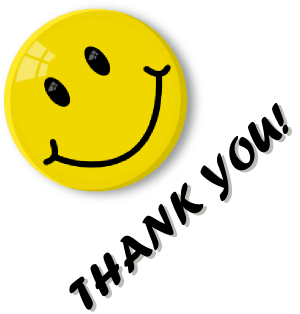